<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [2]:
#Importation de la librairie Pandas
import pandas as pd

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [5]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [9]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [11]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(len(population.columns)))

#La nature des données dans chacune des colonnes
print("Nature des données dans chacune des colonnes : ") 
print(population.dtypes)

#Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de valeurs dans chacune des colonnes : ")
print(population.count())

Le tableau comporte 3 colonne(s).
Nature des données dans chacune des colonnes : 
Zone       object
Année       int64
Valeur    float64
dtype: object
Nombre de valeurs dans chacune des colonnes : 
Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [13]:
#Affichage les 5 premières lignes de la table
population.head(5)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [15]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur'] *= 1000

In [17]:
#Changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})

In [19]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [22]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [24]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(len(dispo_alimentaire.columns)))

Le tableau comporte 18 colonne(s).


In [26]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [28]:
#Remplacement des NaN dans le dataset par des 0
dispo_alimentaire.fillna(0, inplace = True)

In [30]:
#Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
#Liste des colonnes à multiplier par 1000
colonnes_a_multiplier = ['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']

#Multiplier les valeurs des colonnes spécifiées par 1000
dispo_alimentaire[colonnes_a_multiplier] = dispo_alimentaire[colonnes_a_multiplier] * 1000000

In [32]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [35]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [37]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(len(aide_alimentaire.columns)))

Le tableau comporte 4 colonne(s).


In [39]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [41]:
#Changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

#Changement du nom de la colonne Valeur par Aide_Alimentaire
aide_alimentaire.rename(columns={'Valeur': 'Aide_Alimentaire'}, inplace=True)

In [43]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Aide_Alimentaire'] *= 1000

In [45]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,Aide_Alimentaire
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [48]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [50]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s).".format(len(sous_nutrition.columns)))

Le tableau comporte 3 colonne(s).


In [52]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [54]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

ValueError: Unable to parse string "<0.1" at position 60

<span style="color: red; ">**NOTE : l'erreur ci-dessus est due au fait que les données de la colonne 'Valeur' ne soient pas homogènes c'est dire explique moi??????????.**</span>

In [56]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'],errors='coerce')

#Puis remplacement des NaN en 0
sous_nutrition.fillna(0, inplace= True)

In [58]:
#Changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur': 'Sous_nutrition'}, inplace=True)

In [60]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['Sous_nutrition'] *= 1000000

In [62]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [65]:
#Il faut tout d'abord faire une jointure entre population et sous nutrition, en ciblant l'année 2017 :
pop_sous_nutrition = pd.merge(population.loc[population['Année'] == 2017,['Zone', 'Population']], sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018',['Zone', 'Sous_nutrition']],on='Zone')

In [67]:
#Affichage du dataset
pop_sous_nutrition.head()

,Zone,Population,Sous_nutrition
0,Afghanistan,36296113.0,10500000.0
1,Afrique du Sud,57009756.0,3100000.0
2,Albanie,2884169.0,100000.0
3,Algérie,41389189.0,1300000.0
4,Allemagne,82658409.0,0.0


In [69]:
#Nombre de personnes en état de sous nutrition
print("Nombre de personnes en état de sous nutrition :", "{:.0f}".format(pop_sous_nutrition['Sous_nutrition'].sum()))

Nombre de personnes en état de sous nutrition : 535700000


In [71]:
#Proportion du nombre de personnes en état de sous nutrition
print("Proportion de personnes en état de sous nutrition :", "{:.2f}".format(pop_sous_nutrition['Sous_nutrition'].sum()*100/pop_sous_nutrition['Population'].sum()), "%")

Proportion de personnes en état de sous nutrition : 7.10 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [74]:
#Combien mange en moyenne un être humain ? Source => 
print("Un être humain doit manger 2200 Kcal par jour.")
print("Source : FAO (Organisation des Nations Unies pour l'alimentation et l'agriculture).")

Un être humain doit manger 2200 Kcal par jour.
Source : FAO (Organisation des Nations Unies pour l'alimentation et l'agriculture).


In [76]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_2017 = population.loc[population['Année'] == 2017, ['Zone', 'Population']]

dispo_alimentaire_pop = pd.merge(dispo_alimentaire, population_2017, on='Zone')

In [78]:
#Affichage du nouveau dataframe
dispo_alimentaire_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,36296113.0


In [80]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
dispo_alimentaire_pop['dispo_kcal'] = dispo_alimentaire_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * dispo_alimentaire_pop['Population'] * 365

print("Nombre de kcal disponibles mondialement :",(round(dispo_alimentaire_pop['dispo_kcal'].sum())))

Nombre de kcal disponibles mondialement : 7635429388975815


In [82]:
#Calcul du nombre d'humains pouvant être nourris
totalkcal = dispo_alimentaire_pop['dispo_kcal'].sum() / (2200 * 365)

print('Nombre total d"êtres humains pouvant être nourris :', round(totalkcal))
print("Proportion :", "{:.2f}".format(totalkcal*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Nombre total d"êtres humains pouvant être nourris : 9508629376
Proportion : 125.97 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [85]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_alimentaire_vegetaux = dispo_alimentaire_pop.loc[dispo_alimentaire_pop['Origine'] == 'vegetale']

In [87]:
#Calcul du nombre de kcal disponible pour les végétaux
print("Nombre de kcal disponibles pour les végétaux :",round(dispo_alimentaire_vegetaux['dispo_kcal'].sum()))

Nombre de kcal disponibles pour les végétaux : 6300178937197865


In [89]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
humains_nourris_avec_vegetaux = round(dispo_alimentaire_vegetaux['dispo_kcal'].sum() / (2200*365))

print("Nombre d'humains pouvant etre nourris avec les végétaux :", humains_nourris_avec_vegetaux)
print("Proportion :", "{:.2f}".format(humains_nourris_avec_vegetaux*100/population.loc[population['Année'] == 2017,"Population"].sum()), "%")

Nombre d'humains pouvant etre nourris avec les végétaux : 7845801914
Proportion : 103.94 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [92]:
#Calcul de la disponibilité totale
dispo_totale = dispo_alimentaire['Disponibilité intérieure'].sum()

print("Disponibilité intérieure totale :", round(dispo_totale))

Disponibilité intérieure totale : 9848994000000


In [94]:
# Création d'une boucle for pour afficher les proportions des différentes colonnes: Aliments pour animaux, Pertes, Nourriture, Semences, Traitement, Autres Utilisations
colonnes = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations']

proportions = {}
for colonne in colonnes:
    proportion = dispo_alimentaire[colonne].sum() * 100 / dispo_totale
    proportions[colonne] = proportion
    print(f"Proportion de {colonne} : {proportion:.2f} %")

Proportion de Aliments pour animaux : 13.24 %
Proportion de Pertes : 4.61 %
Proportion de Nourriture : 49.51 %
Proportion de Semences : 1.57 %
Proportion de Traitement : 22.38 %
Proportion de Autres Utilisations : 8.78 %


**NOTE - Ci-dessus, j'ai ajouté au script les lignes "proportions = {}" puis "proportions[colonne] = proportion" afin de faciliter la création d'un graphique que nous verrons plus tard.**

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [98]:
#Création d'une liste avec toutes les variables
dispo_alimentaire['Produit'].unique()

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [100]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres", "Soja"]

dispo_alimentaire_cereales = dispo_alimentaire.loc[dispo_alimentaire['Produit'].isin(cereales)]

dispo_alimentaire_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0
15592,Îles Salomon,Soja,vegetale,0.0,0.0,0.0,0.07,0.01,0.04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0


In [102]:
#Affichage de la proportion d'alimentation animale 
print("Proportion d'alimentation animale :", "{:.2f}".format(dispo_alimentaire_cereales['Aliments pour animaux'].sum()*100/dispo_alimentaire_cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation animale : 33.32 %


In [104]:
#Affichage de la proportion d'alimentation humaine
print("Proportion d'alimentation humaine :", "{:.2f}".format(dispo_alimentaire_cereales['Nourriture'].sum()*100/dispo_alimentaire_cereales['Disponibilité intérieure'].sum()), "%")

Proportion d'alimentation humaine : 38.87 %


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [107]:
#Création de la colonne proportion par pays
pop_sous_nutrition['Proportion'] = pop_sous_nutrition['Sous_nutrition']/pop_sous_nutrition['Population']

In [109]:
#Affichage après tri des 10 pires pays
pop_sous_nutrition[['Zone', "Proportion"]].sort_values(by="Proportion", ascending=False).head(10)

,Zone,Proportion
78,Haïti,0.482592
157,République populaire démocratique de Corée,0.471887
108,Madagascar,0.410629
103,Libéria,0.382797
100,Lesotho,0.382494
183,Tchad,0.379576
161,Rwanda,0.350556
121,Mozambique,0.328109
186,Timor-Leste,0.321735
0,Afghanistan,0.289287


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [112]:
#calcul du total de l'aide alimentaire par pays
total_aide_alimentaire_pays = aide_alimentaire.groupby('Zone')['Aide_Alimentaire'].sum().reset_index()

total_aide_alimentaire_pays

,Zone,Aide_Alimentaire
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [114]:
#affichage après tri des 10 pays qui ont bénéficié le plus de l'aide alimentaire
total_aide_alimentaire_pays.sort_values(by="Aide_Alimentaire", ascending=False).head(10)

,Zone,Aide_Alimentaire
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [117]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_selection = aide_alimentaire[['Zone', 'Année', 'Aide_Alimentaire']]

aide_alimentaire_groupee = aide_alimentaire_selection.groupby(['Zone', 'Année']).sum().reset_index()

aide_alimentaire_groupee

,Zone,Année,Aide_Alimentaire
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [119]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficié de l'aide alimentaire
TOP5_aide_alimentaire = total_aide_alimentaire_pays.nlargest(5,'Aide_Alimentaire')

TOP5_liste = TOP5_aide_alimentaire['Zone'].tolist()

print("Les 5 pays ayant le plus bénéficié de l'aide alimentaire sont :", TOP5_liste)

Les 5 pays ayant le plus bénéficié de l'aide alimentaire sont : ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']


In [121]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_filtre = aide_alimentaire_groupee[aide_alimentaire_groupee['Zone'].isin(TOP5_liste)]

aide_alimentaire_filtre

,Zone,Année,Aide_Alimentaire
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [123]:
# Affichage des pays avec l'aide alimentaire par année
aide_alimentaire_par_annee = aide_alimentaire_filtre.pivot(index='Zone', columns='Année', values='Aide_Alimentaire')

aide_alimentaire_par_annee

Année,2013,2014,2015,2016
Zone,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
Soudan,330230000.0,321904000.0,17650000.0,NaN
Soudan du Sud,196330000.0,450610000.0,48308000.0,NaN
Yémen,264764000.0,103840000.0,372306000.0,465574000.0
Éthiopie,591404000.0,586624000.0,203266000.0,NaN


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [126]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_pop_selection = dispo_alimentaire_pop[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Produit']]

dispo_ind_pays = dispo_alimentaire_pop_selection.groupby(['Zone']).sum().reset_index()

dispo_ind_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Produit
0,Afghanistan,2087.0,"Abats ComestibleAgrumes, AutresAliments pour e..."
1,Afrique du Sud,3020.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
2,Albanie,3188.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
3,Algérie,3293.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
4,Allemagne,3503.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
...,...,...,...
167,Émirats arabes unis,3275.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
168,Équateur,2346.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
169,États-Unis d'Amérique,3682.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
170,Éthiopie,2129.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."


In [128]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
dispo_ind_pays.nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Produit
127,République centrafricaine,1879.0,"Abats ComestibleAlcool, non ComestibleAliments..."
164,Zambie,1924.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
91,Madagascar,2056.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
0,Afghanistan,2087.0,"Abats ComestibleAgrumes, AutresAliments pour e..."
65,Haïti,2089.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
132,République populaire démocratique de Corée,2093.0,Abats ComestibleAnimaux Aquatiques AutreAvoine...
150,Tchad,2109.0,"Abats ComestibleAlcool, non ComestibleAliments..."
165,Zimbabwe,2113.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
114,Ouganda,2126.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
152,Timor-Leste,2129.0,Abats ComestibleAliments pour enfantsAnanasAni...


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [131]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
dispo_ind_pays.nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Produit
11,Autriche,3770.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
16,Belgique,3737.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
157,Turquie,3708.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
169,États-Unis d'Amérique,3682.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
74,Israël,3610.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
72,Irlande,3602.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
75,Italie,3578.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
89,Luxembourg,3540.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
166,Égypte,3518.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."
4,Allemagne,3503.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [134]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_thailande = dispo_ind_pays[dispo_ind_pays['Zone'] == 'Thaïlande']

dispo_thailande

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Produit
151,Thaïlande,2785.0,"Abats ComestibleAgrumes, AutresAlcool, non Com..."


In [136]:
#Calcul de la sous nutrition en Thaïlande
sous_nutrition_thailande = pop_sous_nutrition[pop_sous_nutrition['Zone'] == 'Thaïlande']

print(sous_nutrition_thailande)

print("Proportion de personnes en état de sous nutrition en Thaïlande :", "{:.2f}".format(sous_nutrition_thailande['Sous_nutrition'].sum()*100/sous_nutrition_thailande['Population'].sum()), "%")

          Zone  Population  Sous_nutrition  Proportion
185  Thaïlande  69209810.0       6200000.0    0.089583
Proportion de personnes en état de sous nutrition en Thaïlande : 8.96 %


In [138]:
#On calcule la proportion exportée en fonction de la proportion
dispo_alimentaire_thailande_manioc = dispo_alimentaire.loc[(dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Zone'] == 'Thaïlande')]

print("Proportion de manioc exportée :", "{:.2f}".format(dispo_alimentaire_thailande_manioc['Exportations - Quantité'].iloc[0]*100 / dispo_alimentaire_thailande_manioc['Production'].iloc[0]), "%")

Proportion de manioc exportée : 83.41 %


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [141]:
#Rajouter en dessous toutes les analyses complémentaires suite à la demande de mélanie :
#et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

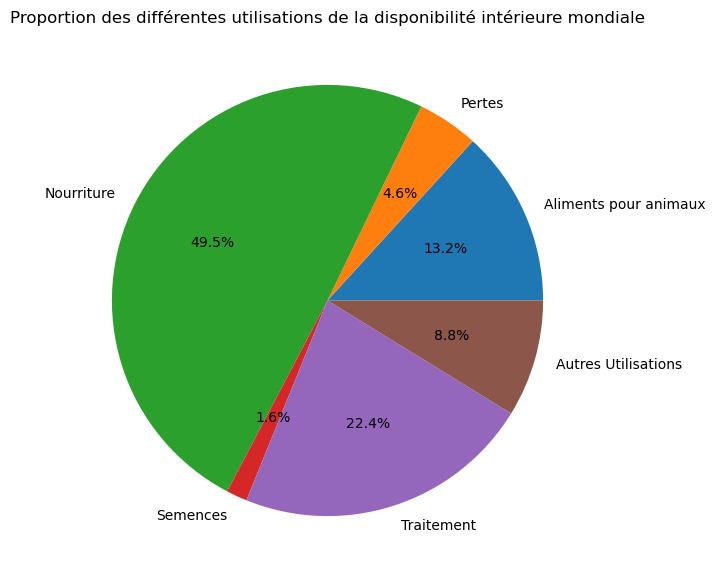

In [143]:
#Créer un graphique représentant l'utilisation de la disponibilité intérieure :

#Importation de la librairie Matplotlib pour la création des graphiques
import matplotlib.pyplot as plt

#Extraction des labels et des valeurs des proportions
labels = list(proportions.keys())
sizes = list(proportions.values())

#Création du graphique en secteurs
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

#Ajout du titre
plt.title('Proportion des différentes utilisations de la disponibilité intérieure mondiale')

#Affichage du graphique
plt.show()

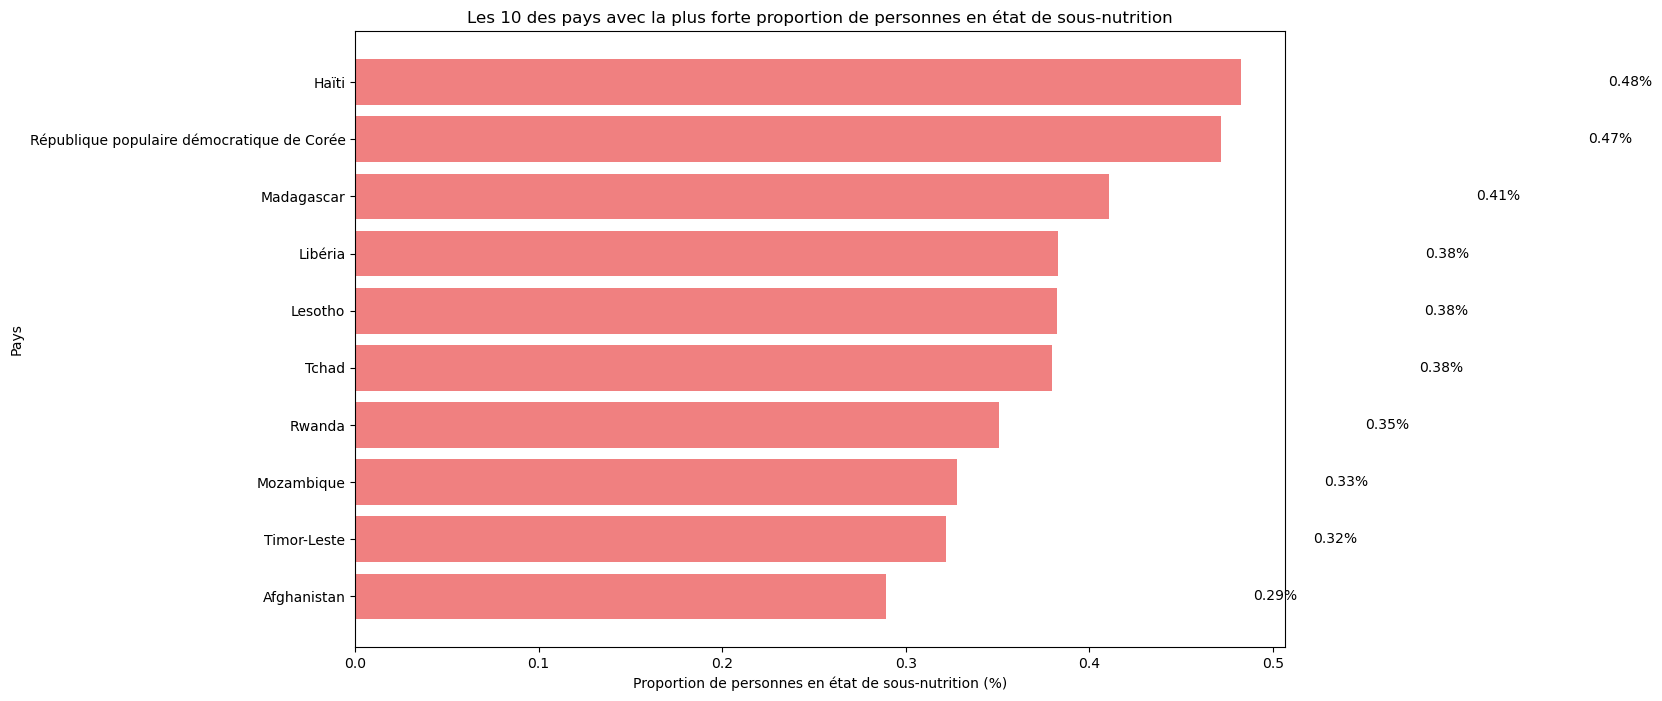

In [145]:
#Créer un graphique pour la liste des 10 pays où la proportion de personnes en état de sous-nutrition est la plus forte en 2017 :

#Création de la variable "prop_pop_sous_nutrition" qui va récupérer la liste des 10 pays dont on a besoin
prop_pop_sous_nutrition = pop_sous_nutrition[['Zone', 'Proportion']].sort_values(by='Proportion', ascending=False).head(10)

#Extraction des labels (pays) et des valeurs (proportions)
labels = prop_pop_sous_nutrition['Zone']
values = prop_pop_sous_nutrition['Proportion']

#Création du graphique en barres horizontales
plt.figure(figsize=(12, 8))
plt.barh(labels, values, color='lightcoral')
plt.xlabel('Proportion de personnes en état de sous-nutrition (%)')
plt.ylabel('Pays')
plt.title('Les 10 des pays avec la plus forte proportion de personnes en état de sous-nutrition')

#Ajout des étiquettes de texte pour afficher les valeurs sur les barres
for i, v in enumerate(values):
    plt.text(v + 0.2, i, f'{v:.2f}%', color='black', va='center')

#Inversement de l'axe y pour avoir le pays avec la plus forte proportion en haut
plt.gca().invert_yaxis()  
plt.show()

In [147]:
#Créer un classement avec la liste des 10 pays qui ont le plus bénéficié de l’aide alimentaire entre 2013 et 2016 :

#Création de la variable "prop_total_aide_alimentaire_pays" qui va récupérer la liste des 10 pays dont on a besoin
prop_total_aide_alimentaire_pays = total_aide_alimentaire_pays.sort_values(by='Aide_Alimentaire', ascending=False).head(10)

#Création d'une liste numérotée avec les 10 pays
classement = []
for i, row in enumerate(prop_total_aide_alimentaire_pays.itertuples(), start=1):
    classement.append(f"{i}. {row.Zone} : {row.Aide_Alimentaire} kg")

#Affichage de la liste numérotée
for top10_aide_alimentaire in classement:
    print(top10_aide_alimentaire)

1. République arabe syrienne : 1858943000 kg
2. Éthiopie : 1381294000 kg
3. Yémen : 1206484000 kg
4. Soudan du Sud : 695248000 kg
5. Soudan : 669784000 kg
6. Kenya : 552836000 kg
7. Bangladesh : 348188000 kg
8. Somalie : 292678000 kg
9. République démocratique du Congo : 288502000 kg
10. Niger : 276344000 kg


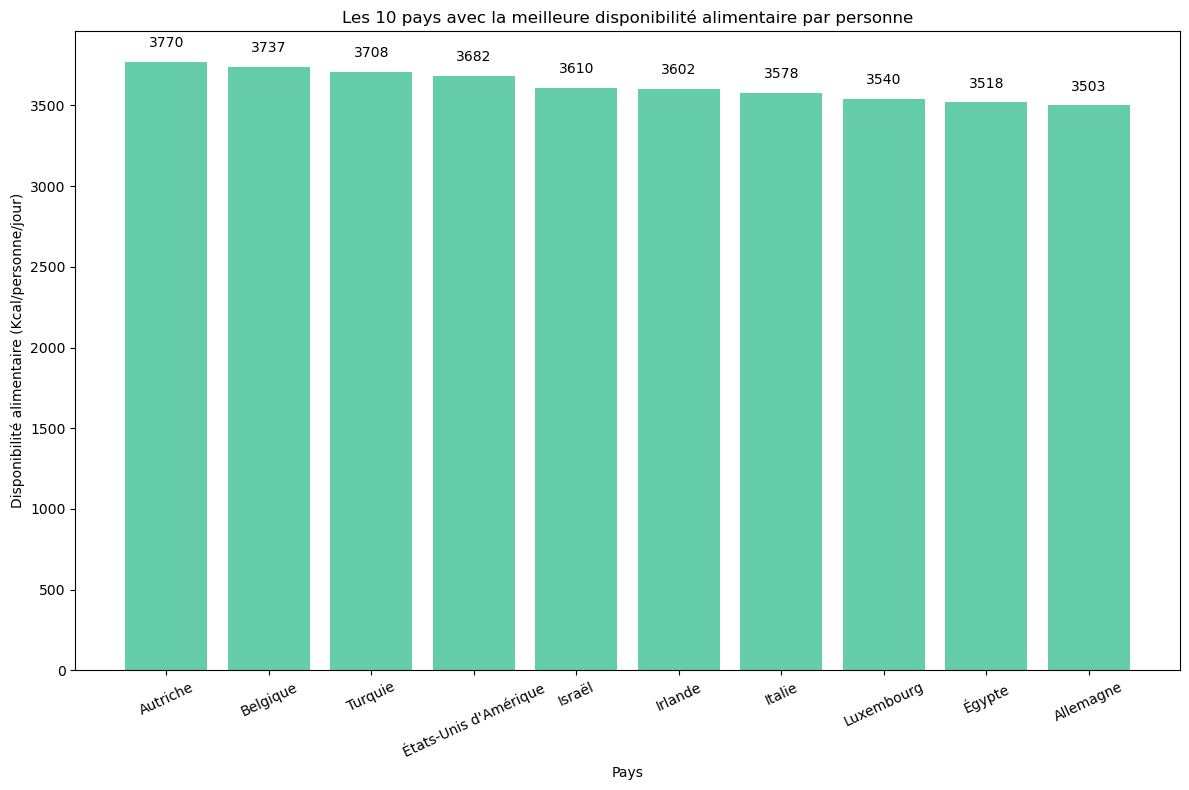

In [149]:
#Créer un graphique des 10 pays avec la plus forte disponibilité alimentaire par personne :

#Création de la variable "top10_meilleures_dispo" qui va récupérer la liste des 10 pays dont on a besoin
top10_meilleures_dispo = dispo_ind_pays.nlargest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

#Extraction des labels (pays) et les valeurs (disponibilité alimentaire)
labels = top10_meilleures_dispo['Zone']
values = top10_meilleures_dispo['Disponibilité alimentaire (Kcal/personne/jour)']

#Création du graphique à barres verticales
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(labels, values, color='mediumaquamarine')
ax.set_xlabel('Pays')
ax.set_ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
ax.set_title('Les 10 pays avec la meilleure disponibilité alimentaire par personne')

#Ajout des étiquettes de texte pour afficher les valeurs au-dessus des barres
for i, v in enumerate(values):
    ax.text(i, v + 0.02 * v, f'{v:.0f}', ha='center', va='bottom')
    
#Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=25)

#Affichage du graphique
plt.tight_layout()
plt.show()

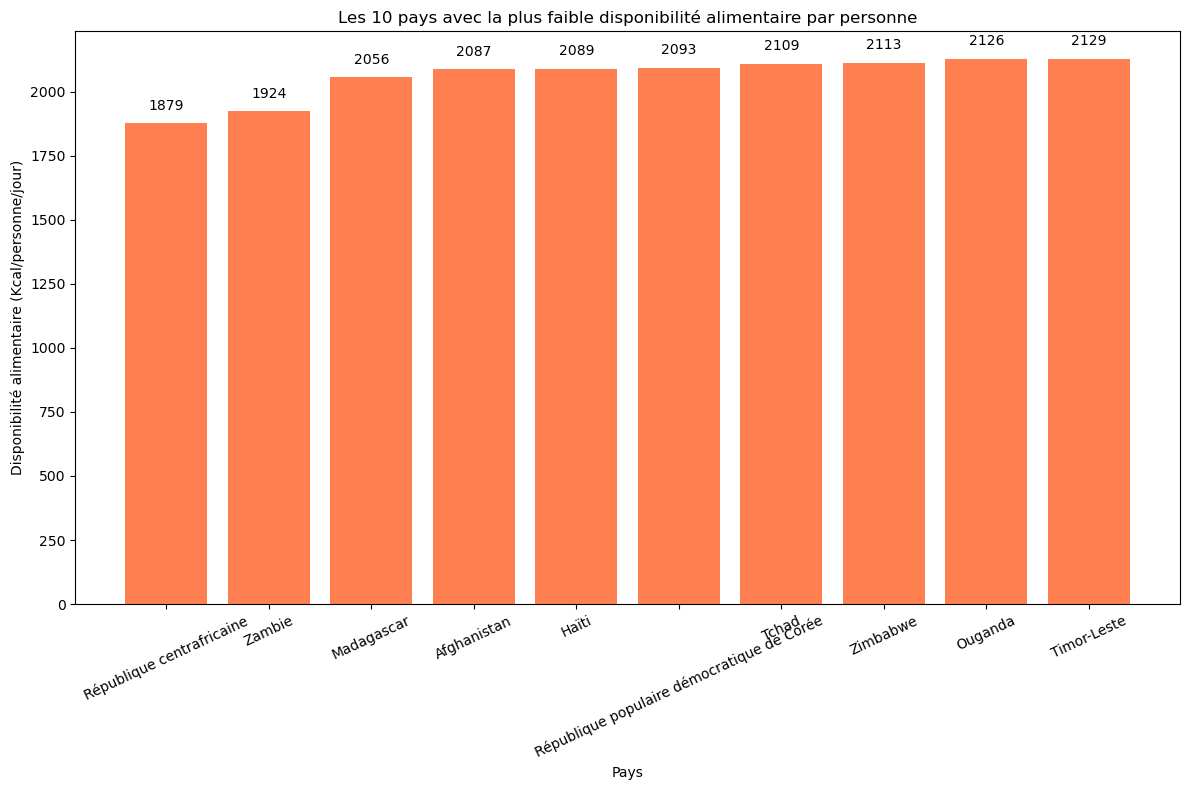

In [151]:
#Créer un graphique des 10 pays avec la plus faible disponibilité alimentaire par personne :

#Création de la variable "top10_pires_dispo" qui va récupérer la liste des 10 pays dont on a besoin
top10_pires_dispo = dispo_ind_pays.nsmallest(10, 'Disponibilité alimentaire (Kcal/personne/jour)')

#Extraction des labels (pays) et les valeurs (disponibilité alimentaire)
labels = top10_pires_dispo['Zone']
values = top10_pires_dispo['Disponibilité alimentaire (Kcal/personne/jour)']

#Création du graphique à barres verticales
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(labels, values, color='coral')
ax.set_xlabel('Pays')
ax.set_ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
ax.set_title('Les 10 pays avec la plus faible disponibilité alimentaire par personne')

#Ajout des étiquettes de texte pour afficher les valeurs au-dessus des barres
for i, v in enumerate(values):
    ax.text(i, v + 0.02 * v, f'{v:.0f}', ha='center', va='bottom')

#Rotation des labels des pays pour une meilleure lisibilité
plt.xticks(rotation=25)

#Affichage du graphique
plt.tight_layout()
plt.show()

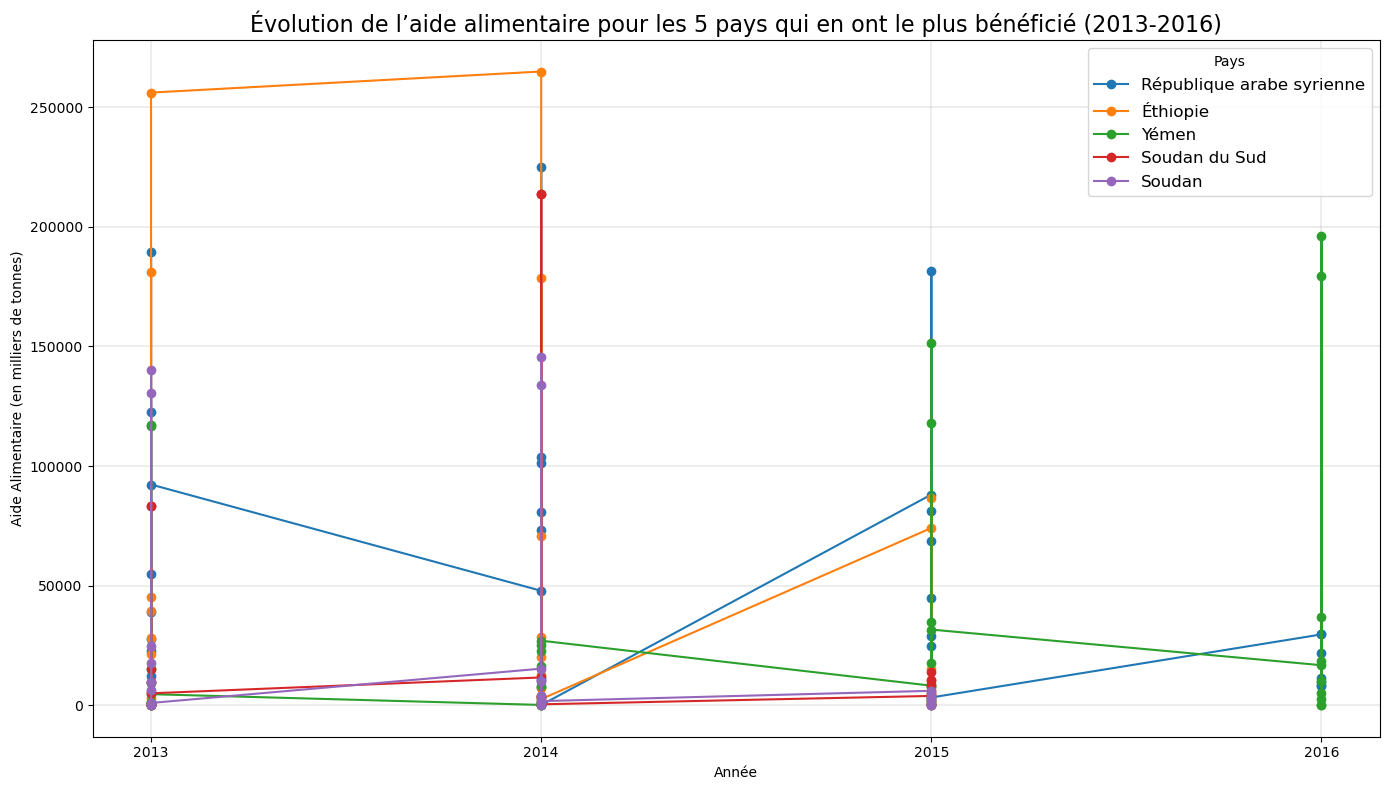

In [153]:
# Filtrer les données entre 2013 et 2016
aide_alimentaire_filtre = aide_alimentaire[(aide_alimentaire['Année'] >= 2013) & (aide_alimentaire['Année'] <= 2016)]
aide_alimentaire_filtre['Aide_Alimentaire'] /= 1000
TOP5_liste = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]
aide_alimentaire_top5 = aide_alimentaire_filtre[aide_alimentaire_filtre['Zone'].isin(TOP5_liste)]

# Création du graphique à courbes
plt.figure(figsize=(14, 8))
for country in TOP5_liste:
    country_data = aide_alimentaire_top5[aide_alimentaire_top5['Zone'] == country]
    country_data = country_data.sort_values(by='Année')
    years = country_data['Année'].values
    aid_values = country_data['Aide_Alimentaire'].values
    plt.plot(years, aid_values, marker='o', label=country)
plt.xlabel('Année')
plt.ylabel('Aide Alimentaire (en milliers de tonnes)')
plt.title('Évolution de l’aide alimentaire pour les 5 pays qui en ont le plus bénéficié (2013-2016)', fontsize=16)
plt.legend(title='Pays', loc='upper right', fontsize=12)
plt.xticks(ticks=range(2013, 2017), labels=range(2013, 2017))
plt.grid(color='gray', linestyle='-', linewidth=0.2)


plt.tight_layout()
plt.show()

In [155]:
#Evolution du total des aides alimentaires attribuées par année
evolution = aide_alimentaire_selection[['Année','Aide_Alimentaire']]

evolution_aide_alimentaire = evolution.groupby(['Année']).sum().reset_index()

print(evolution_aide_alimentaire)

   Année  Aide_Alimentaire
0   2013        4165674000
1   2014        3939152000
2   2015        2187507000
3   2016         743568000


In [250]:
#Evolution du total du nombre de personnes en état de sous-nutrition par année
evolution2 = sous_nutrition[['Année','Sous_nutrition']]

evolution_sous_nutrition = evolution2.groupby(['Année']).sum().reset_index()

print(evolution_sous_nutrition)

       Année  Sous_nutrition
0  2012-2014     528100000.0
1  2013-2015     523500000.0
2  2014-2016     524700000.0
3  2015-2017     528600000.0
4  2016-2018     535700000.0
5  2017-2019     544200000.0
